<a href="https://colab.research.google.com/github/ThemindaSrimal/MLP-BreastCancerPredictor/blob/main/BreastCancerPredictionCO544.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

Import dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# ***WorkFlow***
**Data Collection --> Analysis --> Standardization --> Split --> Train --> Accuracy --> Present**

In [ ]:


#    from google.colab import drive
#    drive.mount('/content/gdrive')
#    loading the Breast Cancer dataset to a pandas DataFrame
#    BreastCancer_dataset = pd.read_csv('/content/gdrive/MyDrive/MachineLearning/BreastCancerPrediction/dataR2.csv') 



In [ ]:
#loading the Breast Cancer dataset to a pandas DataFrame
BreastCancer_dataset = pd.read_csv('/content/dataR2.csv') 

In [ ]:
# printing some values to get an overview
BreastCancer_dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


**Labels**

*   Healthy Controls :  1
*   Patients         :  2


**Quantitative Attributes:**

*   Age (years)
*   BMI (kg/m2)
*   Glucose (mg/dL)
*   Insulin (µU/mL)
*   HOMA
*   Leptin (ng/mL)
*   Adiponectin (µg/mL)
*   Resistin (ng/mL)
*   MCP-1(pg/dL)

In [ ]:
# number of rows and Columns in this dataset
BreastCancer_dataset.shape

(116, 10)

In [ ]:
# getting the statistical measures of the data
BreastCancer_dataset.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [ ]:
# number of healthy controls and patients (1 healthy, 2 patients)
BreastCancer_dataset['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
# Analyse healthy vs patients by mean value
BreastCancer_dataset.groupby('Classification').mean()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
Classification,,,,,,,,,
1,58.076923,28.317336,88.230769,6.933769,1.552398,26.637933,10.328205,11.614813,499.730692
2,56.671875,26.984740,105.562500,12.513219,3.623342,26.596512,10.061167,17.253777,563.016500


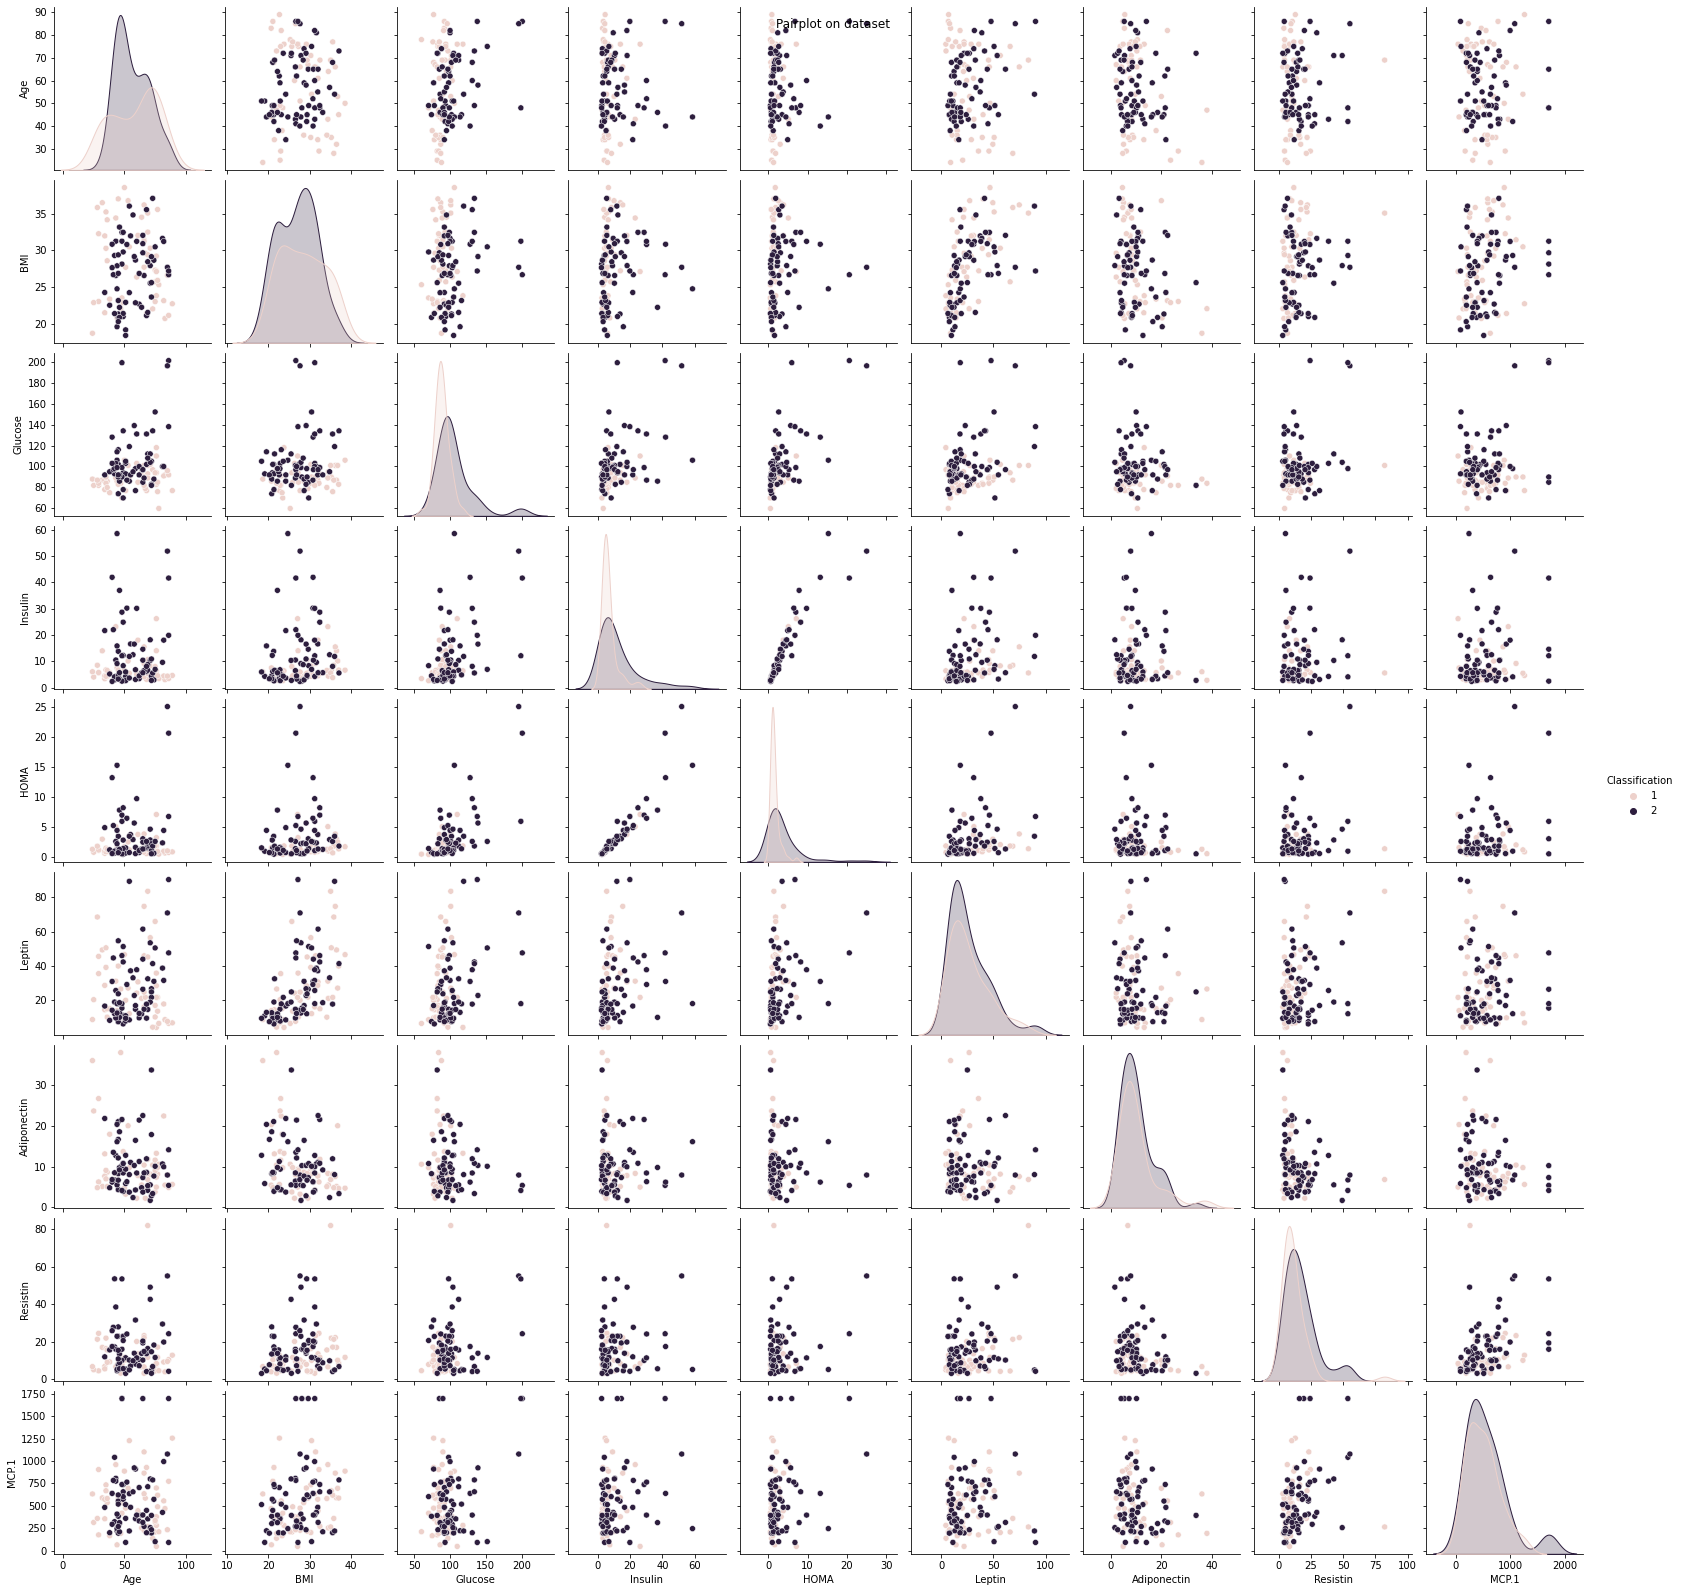

In [ ]:
# Pairplot on dataset
g = sns.pairplot(BreastCancer_dataset, hue="Classification")
g.fig.suptitle("Pairplot on dataset")
g

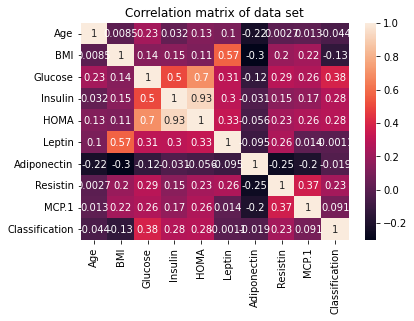

In [ ]:
# correlation matrix
corrMatrix = BreastCancer_dataset.corr()
g2=sns.heatmap(corrMatrix, annot = True)
plt.title("Correlation matrix of data set")
g2

##Separate the Classification to seperate data into Test and Train

In [ ]:
# separating the data and labels
X = BreastCancer_dataset.drop(columns = 'Classification', axis=1)  # axis = 1 (specify column)
Y = BreastCancer_dataset['Classification']

In [ ]:
print(X)  # print ds to make sure

     Age        BMI  Glucose  Insulin  ...   Leptin  Adiponectin  Resistin    MCP.1
0     48  23.500000       70    2.707  ...   8.8071     9.702400   7.99585  417.114
1     83  20.690495       92    3.115  ...   8.8438     5.429285   4.06405  468.786
2     82  23.124670       91    4.498  ...  17.9393    22.432040   9.27715  554.697
3     68  21.367521       77    3.226  ...   9.8827     7.169560  12.76600  928.220
4     86  21.111111       92    3.549  ...   6.6994     4.819240  10.57635  773.920
..   ...        ...      ...      ...  ...      ...          ...       ...      ...
111   45  26.850000       92    3.330  ...  54.6800    12.100000  10.96000  268.230
112   62  26.840000      100    4.530  ...  12.4500    21.420000   7.32000  330.160
113   65  32.050000       97    5.730  ...  61.4800    22.540000  10.33000  314.050
114   72  25.590000       82    2.820  ...  24.9600    33.750000   3.27000  392.460
115   86  27.180000      138   19.910  ...  90.2800    14.110000   4.35000  

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


# **Data Normalization and Standardization**

**Data Standardization**

In [ ]:
# get standard scalar  z = (x - u) / s  ; u = mean , s = standard deviation (range - to + value depend on data)
scaler = StandardScaler()   #Standardize features by removing the mean and scaling to unit variance

In [ ]:
scaler.fit(X)  # Compute the mean and std to be used for later scaling.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)   # Perform standardization by centering and scaling

In [ ]:
print(standardized_data)  # see standardized data

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]


In [ ]:
# take standardize data for further processing 
X = standardized_data                 
Y = BreastCancer_dataset['Classification']

In [ ]:
print(X)
print(Y)

[[-0.57979363 -0.81667527 -1.23922225 ... -0.07022151 -0.54551749
  -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 ... -0.69734988 -0.86421418
  -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 ...  1.79799836 -0.4416602
   0.05821407]
 ...
 [ 0.47984774  0.89385486 -0.03536242 ...  1.81384272 -0.3563202
  -0.64049127]
 [ 0.91617066 -0.39854568 -0.70417344 ...  3.45903808 -0.92857684
  -0.41283214]
 [ 1.7888165  -0.0804471   1.79272102 ...  0.57664406 -0.84103616
  -1.29074683]]
0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64


# **Split dataset : Train set , Test set**

In [ ]:
# split ( make sure we split them roughly with equal patients and healthy into both sides )
# Test set size 20%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(116, 9) (92, 9) (24, 9)


# **Train the model**

In [ ]:
# source vector 

classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Accuracy Score**

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8043478260869565


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7083333333333334


# **Classification Report**

In [ ]:
print(classification_report(Y_test,X_test_prediction,target_names=["Healthy","Patients"]))

              precision    recall  f1-score   support

     Healthy       0.64      0.82      0.72        11
    Patients       0.80      0.62      0.70        13

    accuracy                           0.71        24
   macro avg       0.72      0.72      0.71        24
weighted avg       0.73      0.71      0.71        24



# **Predictive System**

In [ ]:
input_data = (45,20.83,74,4.56,0.832,7.76,8.24,28,384)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person likely to be healthy')
else:
  print('The person likely to have Brest Cancer')

[[-0.76678917 -1.35084081 -1.06087264 -0.54388816 -0.51374184 -0.98715483
  -0.28484539  1.07594251 -0.43739529]]
[2]
The person likely to have Brest Cancer


### **Same process using KNeighborsClassifier**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(5)

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# classification report
print(classification_report(Y_test,X_test_prediction,target_names=["Healthy","Patients"]))

input_data = (45,20.83,74,4.56,0.832,7.76,8.24,28,384)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person likely to be healthy')
else:
  print('The person likely to have Brest Cancer')

Accuracy score of the training data :  0.8043478260869565
Accuracy score of the test data :  0.8333333333333334
              precision    recall  f1-score   support

     Healthy       0.82      0.82      0.82        11
    Patients       0.85      0.85      0.85        13

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24

[[-0.76678917 -1.35084081 -1.06087264 -0.54388816 -0.51374184 -0.98715483
  -0.28484539  1.07594251 -0.43739529]]
[2]
The person likely to have Brest Cancer


### **Same process using GaussianNB classifier**

---



In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# classification report
print(classification_report(Y_test,X_test_prediction,target_names=["Healthy","Patients"]))

input_data = (45,20.83,74,4.56,0.832,7.76,8.24,28,384)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person likely to be healthy')
else:
  print('The person likely to have Brest Cancer')

Accuracy score of the training data :  0.6630434782608695
Accuracy score of the test data :  0.5833333333333334
              precision    recall  f1-score   support

     Healthy       0.53      0.91      0.67        11
    Patients       0.80      0.31      0.44        13

    accuracy                           0.58        24
   macro avg       0.66      0.61      0.56        24
weighted avg       0.67      0.58      0.55        24

[[-0.76678917 -1.35084081 -1.06087264 -0.54388816 -0.51374184 -0.98715483
  -0.28484539  1.07594251 -0.43739529]]
[1]
The person likely to be healthy


### **Same process using RandomForestClassifier**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# classification report
print(classification_report(Y_test,X_test_prediction,target_names=["Healthy","Patients"]))

input_data = (45,20.83,74,4.56,0.832,7.76,8.24,28,384)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person likely to be healthy')
else:
  print('The person likely to have Brest Cancer')

Accuracy score of the training data :  0.8478260869565217
Accuracy score of the test data :  0.8333333333333334
              precision    recall  f1-score   support

     Healthy       0.89      0.73      0.80        11
    Patients       0.80      0.92      0.86        13

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24

[[-0.76678917 -1.35084081 -1.06087264 -0.54388816 -0.51374184 -0.98715483
  -0.28484539  1.07594251 -0.43739529]]
[2]
The person likely to have Brest Cancer


### **Same process using AdaBoostClassifier**

---



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier()

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

# classification report
print(classification_report(Y_test,X_test_prediction,target_names=["Healthy","Patients"]))

input_data = (45,20.83,74,4.56,0.832,7.76,8.24,28,384)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('The person likely to be healthy')
else:
  print('The person likely to have Brest Cancer')

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.75
              precision    recall  f1-score   support

     Healthy       0.69      0.82      0.75        11
    Patients       0.82      0.69      0.75        13

    accuracy                           0.75        24
   macro avg       0.76      0.76      0.75        24
weighted avg       0.76      0.75      0.75        24

[[-0.76678917 -1.35084081 -1.06087264 -0.54388816 -0.51374184 -0.98715483
  -0.28484539  1.07594251 -0.43739529]]
[2]
The person likely to have Brest Cancer


### **Repated k-Fold Cross-Validation using SVM**
Reference1 = https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

Reference2 = https://scikit-learn.org/stable/modules/cross_validation.html


>1 mean=0.7235 se=0.040
>2 mean=0.7330 se=0.030
>3 mean=0.7326 se=0.021
>4 mean=0.7350 se=0.018
>5 mean=0.7341 se=0.016
>6 mean=0.7356 se=0.016
>7 mean=0.7376 se=0.014
>8 mean=0.7358 se=0.013
>9 mean=0.7351 se=0.013
>10 mean=0.7364 se=0.012
>11 mean=0.7366 se=0.011
>12 mean=0.7355 se=0.011
>13 mean=0.7353 se=0.010
>14 mean=0.7369 se=0.010
>15 mean=0.7356 se=0.010


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


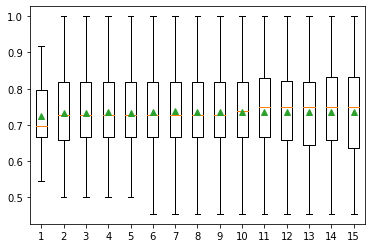

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import svm
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model =  svm.SVC(kernel='linear')
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
X = X
y = Y

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

### **Repated k-Fold Cross-Validation using KNeighborsClassifier**
Reference1 = https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

Reference2 = https://scikit-learn.org/stable/modules/cross_validation.html

>1 mean=0.7674 se=0.033
>2 mean=0.7633 se=0.024
>3 mean=0.7641 se=0.020
>4 mean=0.7589 se=0.016
>5 mean=0.7552 se=0.015
>6 mean=0.7563 se=0.015
>7 mean=0.7557 se=0.014
>8 mean=0.7596 se=0.013
>9 mean=0.7603 se=0.013
>10 mean=0.7573 se=0.012
>11 mean=0.7582 se=0.011
>12 mean=0.7573 se=0.011
>13 mean=0.7552 se=0.011
>14 mean=0.7536 se=0.011
>15 mean=0.7530 se=0.010


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


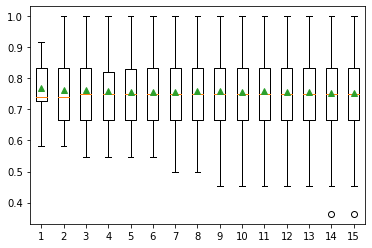

In [ ]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier 
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create model
    model =  KNeighborsClassifier(5)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# create dataset
X = X
y = Y

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()